<a href="https://colab.research.google.com/github/esragcetnky/TensorFlow-Pokemon-Course/blob/main/GetStartedWithTensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.Mount Drive

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1.Packages 

In [105]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

# 2.Dataset

## 2.1 Load Data

In [106]:
#read the csv file using pandas library
dataset=pd.read_csv('drive/MyDrive/GitHub/pokemon_alopez247.csv')

In [107]:
dataset.columns

Index(['Number', 'Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack',
       'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'isLegendary',
       'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1', 'Egg_Group_2',
       'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Catch_Rate',
       'Body_Style'],
      dtype='object')

## 2.2 Cleaning Dataset

In [108]:
# getting rid of useless columns
dataset = dataset[['isLegendary','Generation', 'Type_1', 'Type_2', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed','Color','Egg_Group_1','Height_m','Weight_kg','Body_Style']]

## 2.3 Formatting dataset

In [109]:
# format dataset to be numerical
dataset['isLegendary']=dataset['isLegendary'].astype(int)

In [110]:
# creating dummy variables
def dummy_creation(dataset,dummy_categories):
  for i in dummy_categories:
    dataset_dummy=pd.get_dummies(dataset[i])
    dataset=pd.concat([dataset,dataset_dummy],
                      axis=1)
    dataset=dataset.drop(i,axis=1)
  return dataset

In [111]:
dataset=dummy_creation(dataset, ['Egg_Group_1', 'Body_Style', 'Color','Type_1', 'Type_2'])

In [112]:
dataset

,isLegendary,Generation,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Height_m,Weight_kg,Amorphous,Bug,Ditto,Dragon,Fairy,Field,Flying,Grass,Human-Like,Mineral,Monster,Undiscovered,Water_1,Water_2,Water_3,bipedal_tailed,bipedal_tailless,four_wings,head_arms,head_base,head_legs,head_only,insectoid,multiple_bodies,quadruped,serpentine_body,several_limbs,two_wings,with_fins,Black,...,Purple,Red,White,Yellow,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,0,1,45,49,49,65,65,45,0.71,6.9,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,1,60,62,63,80,80,60,0.99,13.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,1,80,82,83,100,100,80,2.01,100.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,1,39,52,43,60,50,65,0.61,8.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,58,64,58,80,65,80,1.09,19.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,1,6,126,131,95,131,98,99,5.79,203.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
717,1,6,108,100,121,81,95,95,5.00,305.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
718,1,6,50,100,150,100,150,50,0.71,8.8,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
719,1,6,80,110,60,150,130,70,0.51,9.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


# 3.Visualize
* In this part i made some visualizations to make practices
* also it can help to understand dataset


## 3.1 Scatter Plot

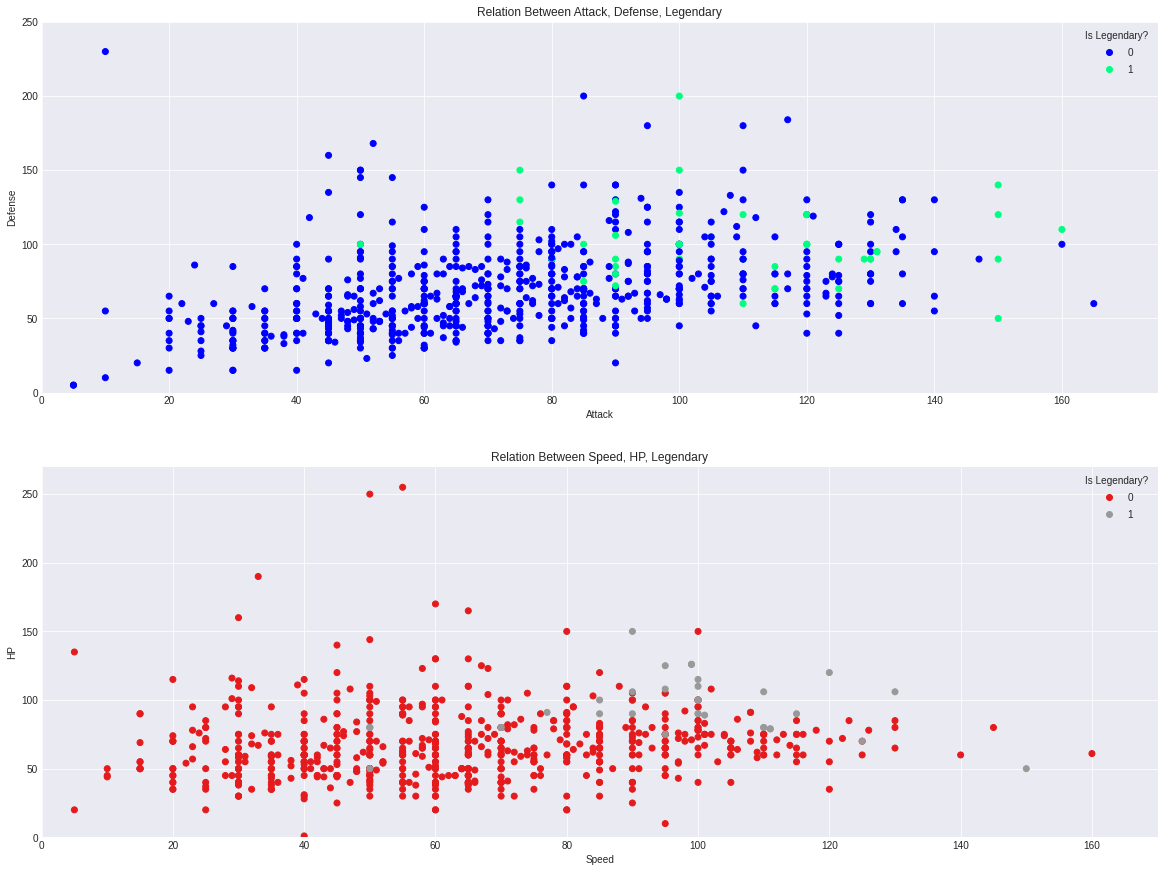

In [113]:
plt.style.use('seaborn-darkgrid')

# created figure with 3 ax in it
fig, (ax0,ax1)=plt.subplots(figsize=(20,15),
                            ncols=1,
                            nrows=2)

# ax0 is a scatter plot
plot0=ax0.scatter(dataset['Attack'],
                dataset['Defense'],
                c=dataset['isLegendary'],
                cmap='winter')
ax0.legend(*plot0.legend_elements(),
          title="Is Legendary?")
ax0.set(title="Relation Between Attack, Defense, Legendary",
       xlabel='Attack',
       ylabel='Defense')

ax0.set_xlim([0,175])
ax0.set_ylim([0,250])

#ax1 is a scatter plot 
plot1=ax1.scatter(dataset['Speed'],
                dataset['HP'],
                c=dataset['isLegendary'],
                cmap='Set1')
ax1.legend(*plot1.legend_elements(),
          title="Is Legendary?")
ax1.set(title="Relation Between Speed, HP, Legendary",
       xlabel='Speed',
       ylabel='HP')
ax1.set_xlim([0,170])
ax1.set_ylim([0,270])

fig.show()

## 3.2 Histogram Plot

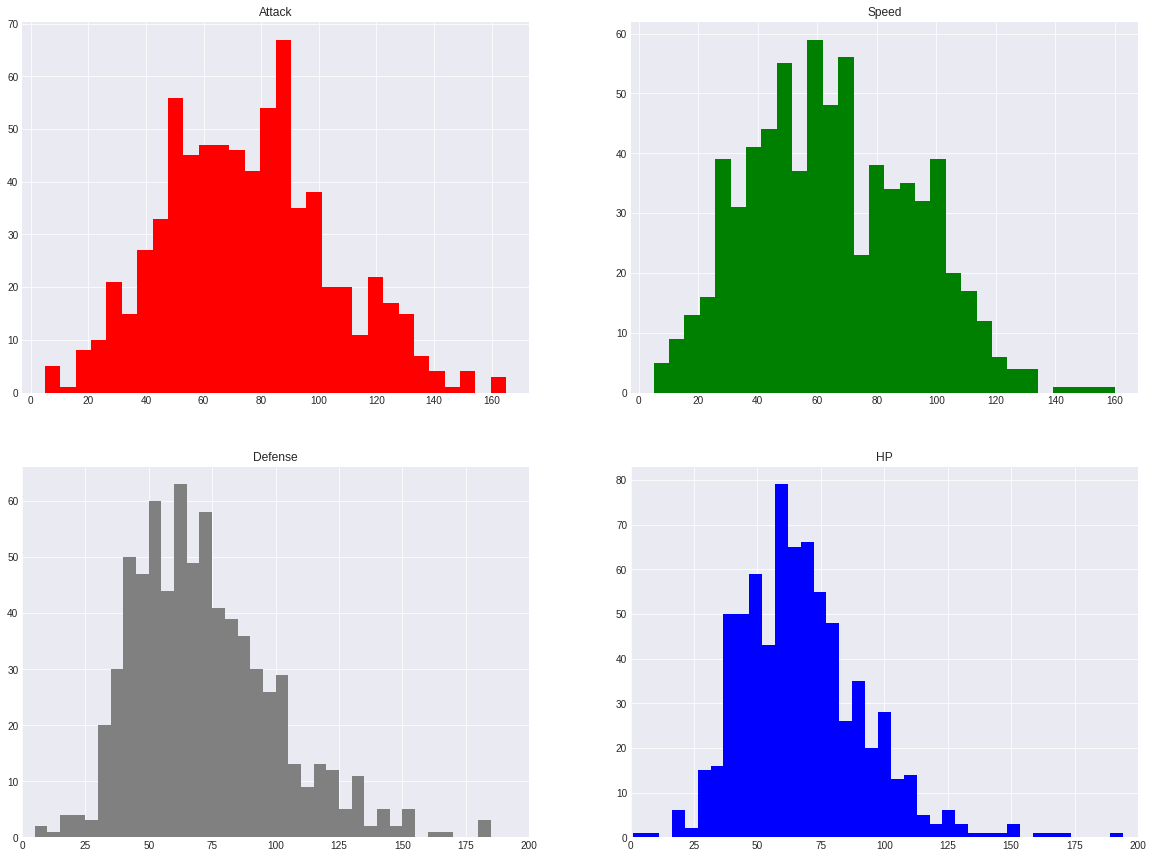

In [114]:
fig, ((ax0,ax1),(ax2,ax3))=plt.subplots(nrows=2,ncols=2,figsize=(20,15))

ax0.hist(dataset['Attack'],color='red',bins=30)
ax0.set_title(label='Attack')

ax1.hist(dataset['Speed'],color='green',bins=30)
ax1.set_title(label='Speed')

ax2.hist(dataset['Defense'],color='grey',bins=45)
ax2.set_title(label='Defense')
ax2.set_xlim([0,200])

ax3.hist(dataset['HP'],color='blue',bins=50)
ax3.set_title(label='HP')
ax3.set_xlim([0,200])

fig.show()

# 4.Split and Normalize Data

## 4.1 Splitting data to train and test dataset

In [115]:
def train_test_splitter(dataset,column):
  # This function takes any Pokémon whose "Generation" label is equal to 1 and putting it into the test dataset, 
  # and putting everyone else in the training dataset. It then drops the Generation category from the dataset.
  df_train=dataset.loc[dataset[column] != 1]
  df_test=dataset.loc[dataset[column] == 1]

  df_train= df_train.drop(column,axis=1)
  df_test=df_test.drop(column,axis=1)

  return(df_train,df_test)

In [119]:
train_data, test_data=train_test_splitter(dataset, 'Generation')

In [120]:
train_data.shape, test_data.shape

((570, 84), (151, 84))

## 4.2 Extracting labels from the data

In [122]:
# now we need to seperate the labels
def label_delineator(df_train,df_test,label):
  # This function extracts the data from the DataFrame and puts it into arrays that TensorFlow can understand with.values
  train_data=df_train.drop(label,axis=1).values
  test_data=df_test.drop(label,axis=1).values

  train_label=df_train[label].values
  test_label=df_test[label].values

  return train_data, train_label, test_data, test_label

In [123]:
train_data, train_label, test_data, test_label=label_delineator(train, test, 'isLegendary')

In [124]:
train_data.shape, train_label.shape, test_data.shape, test_label.shape

((570, 83), (570,), (151, 83), (151,))

## 4.3 Normalizing the data

In [125]:
# let's normalize the data so everything is on the same scale
def data_normalizer(trainX ,testX):
  train=preprocessing.MinMaxScaler().fit_transform(trainX, y=None)
  test_=preprocessing.MinMaxScaler().fit_transform(testX, y=None)
  return (train,test)

In [126]:
train_data, test_data=data_normalizer(train_data, test_data)

# 5.Creating Model & Adding Layers

## 5.1 Creating Model

In [127]:
# Creating model using keras
# model will have 2 fully connected layers
from keras.models import Sequential
from keras.layers import Dense

# model created 
model=Sequential()

# input size of first layer will be shape of the entry in our dataset
length=train_data.shape[1]

## 5.2 Adding Dense Layers

In [128]:
model.add(Dense(500,
                activation='relu',
                input_shape=[length,]))

In [129]:
model.add(Dense(2,
                activation='softmax'))

In [130]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 500)               42000     
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 1002      
Total params: 43,002
Trainable params: 43,002
Non-trainable params: 0
_________________________________________________________________


# 6.Compile and Evaluate Model

## 6.1 Compile Model

In [131]:
model.compile(optimizer='sgd', #determines how the model is updated as it gains information
              loss='sparse_categorical_crossentropy', # measures how accurate the model is as it trains
              metrics=['accuracy'] )

## 6.2 Train Model

In [133]:
# One epoch is when the model has iterated over every sample once. 
# Essentially the number of epochs is equal to the number of times we want to cycle through the data. 
# We'll start with just 1 epoch, and then show that increasing the epoch improves the results.
model.fit(x=train_data,
          y=train_label,
          epochs=400   )

Epoch 1/400
18/18 [==============================] - 1s 1ms/step - loss: 0.6397 - accuracy: 0.7307
Epoch 2/400
18/18 [==============================] - 0s 2ms/step - loss: 0.4725 - accuracy: 0.9382
Epoch 3/400
18/18 [==============================] - 0s 2ms/step - loss: 0.3901 - accuracy: 0.9321
Epoch 4/400
18/18 [==============================] - 0s 2ms/step - loss: 0.3672 - accuracy: 0.9078
Epoch 5/400
18/18 [==============================] - 0s 2ms/step - loss: 0.3116 - accuracy: 0.9305
Epoch 6/400
18/18 [==============================] - 0s 2ms/step - loss: 0.3121 - accuracy: 0.9185
Epoch 7/400
18/18 [==============================] - 0s 2ms/step - loss: 0.2882 - accuracy: 0.9235
Epoch 8/400
18/18 [==============================] - 0s 2ms/step - loss: 0.2742 - accuracy: 0.9275
Epoch 9/400
18/18 [==============================] - 0s 2ms/step - loss: 0.2595 - accuracy: 0.9295
Epoch 10/400
18/18 [==============================] - 0s 2ms/step - loss: 0.2719 - accuracy: 0.9181
Epoch 11/

# 7.Test Model

In [142]:
test_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0])

In [134]:
loss_value, accuracy_value= model.evaluate(test_data,test_label)

ValueError: ignored